## Question 3 : Intensity Maps of the Island of Hawaii

#### Pseudocode

1. Import relevant packages
2. Open the data from the NASA Space Shuttle Radar Topography Mission (SRTM)
    1. Begin with defining an empty array to fill
    2. Open the file, Python does this starting a pointer at the beginning of the file
    3. In a for loop load in every two binary values, unpack into a tuple and store this value
    4. Loop over the 1201 row and 1201 columns, storing the first value of this tuple as the ith jth value of the empty array
3. Define a function to compute the gradient of a N-dimensional array. This is done by using the central differences for most points and the forward or backward differences for the edges to prevent any errors. 
    1. Find the size of the array (N)
    2. Define an empty array to fill the gradient values as well as arrays of slices of the domain into edges and the rest of the values
    3. For Loop for each dimension of the array, filling these slices with either central, forward, or backward differences
    4. Store the values in the array of gradient values
    5. empty slices to reuse
    6. Finally, output the N-dimensional array matching the input array
4. Plot the height values of Hawaii
5. Calculate the intensity of Light using the equation 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct 
import seaborn as sns
sns.set()

In [2]:
a_w = np.empty((1201,1201))
s_filename = 'N19W156.hgt'
f = open(s_filename, 'rb')
for i in range(1201):
    for j in range(1201):
        b_buf = f.read(2)
        val = struct.unpack('>h', b_buf)
        a_w[i,j] = val[0]

In [17]:
def Gradient(a_array):
    #input is a N dimensional array
    N = len(a_array.shape) # number of dimensions
    a_gradient = []
    a_part1 = [slice(None)]*N
    a_part2 = [slice(None)]*N
    a_part3 = [slice(None)]*N
    # The main trick here which I learned from np.gradient
    # is that I use central differences on all points except the first differences on endpoints
    for i in range(N):
        # select out appropriate parts for this dimension
        out = np.empty_like(a_array)
        a_part1[i] = slice(1, -1)
        a_part2[i] = slice(2, None)
        a_part3[i] = slice(None, -2)
        # 1D equivalent -- out[1:-1] = (f[2:] - f[:-2])/2.0
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])/2.0
        a_part1[i] = 0
        a_part2[i] = 1
        a_part3[i] = 0
        # 1D equivalent -- out[0] = (f[1] - f[0])
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])
        a_part1[i] = -1
        a_part2[i] = -1
        a_part3[i] = -2
        # 1D equivalent -- out[-1] = (f[-1] - f[-2])
        out[a_part1] = (a_array[a_part2] - a_array[a_part3])

        # Here I divide by step size
        a_gradient.append(out)

        # empty the arrays to reuse them
        a_part1[i] = slice(None)
        a_part2[i] = slice(None)
        a_part3[i] = slice(None)
        
    return a_gradient

In [18]:
a_grad = Gradient(a_w)

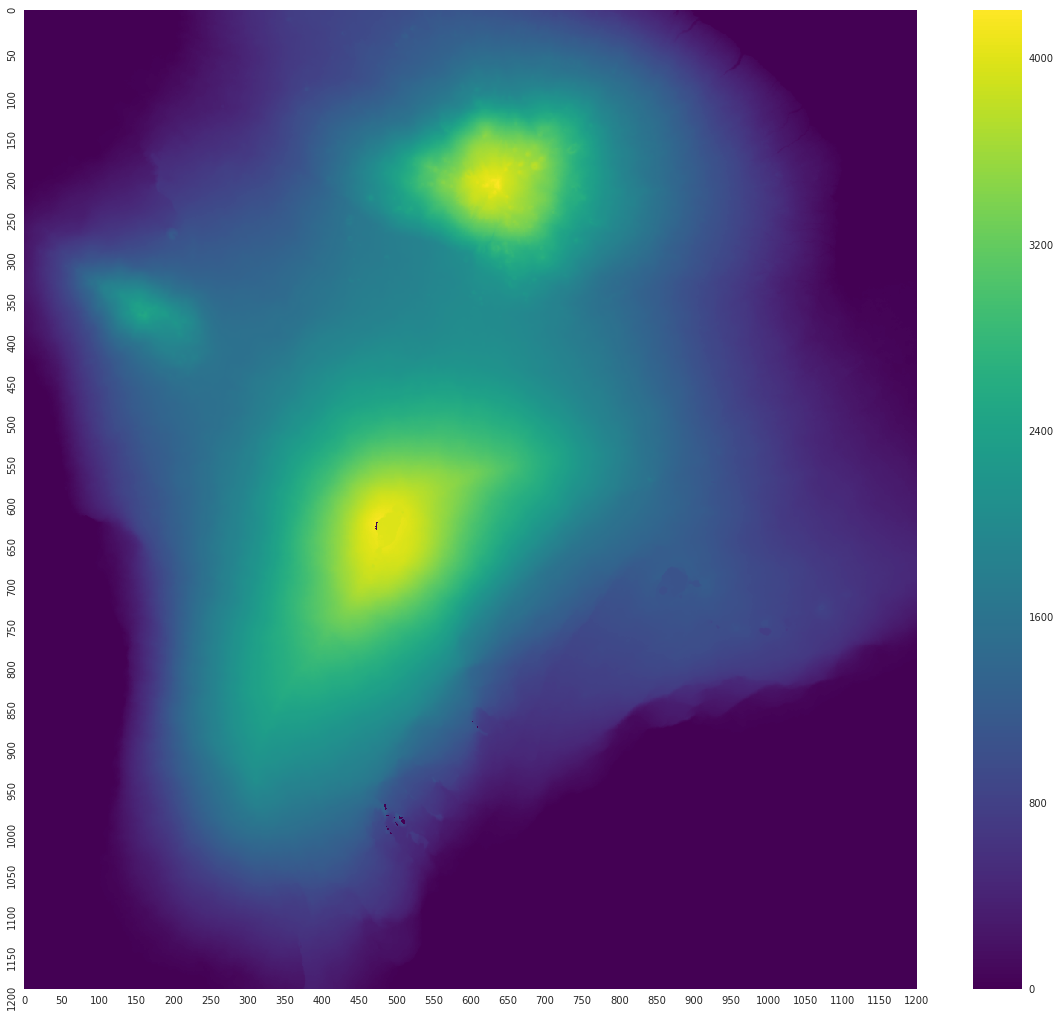

In [7]:
plt.figure(figsize = (20,18))
sns.heatmap(a_w,cmap = 'viridis', vmin = 0,xticklabels = 50, yticklabels = 50)

In [8]:
a_intensity = (a_grad[0])/np.sqrt(a_grad[0]**2+a_grad[1]**2 + 1)

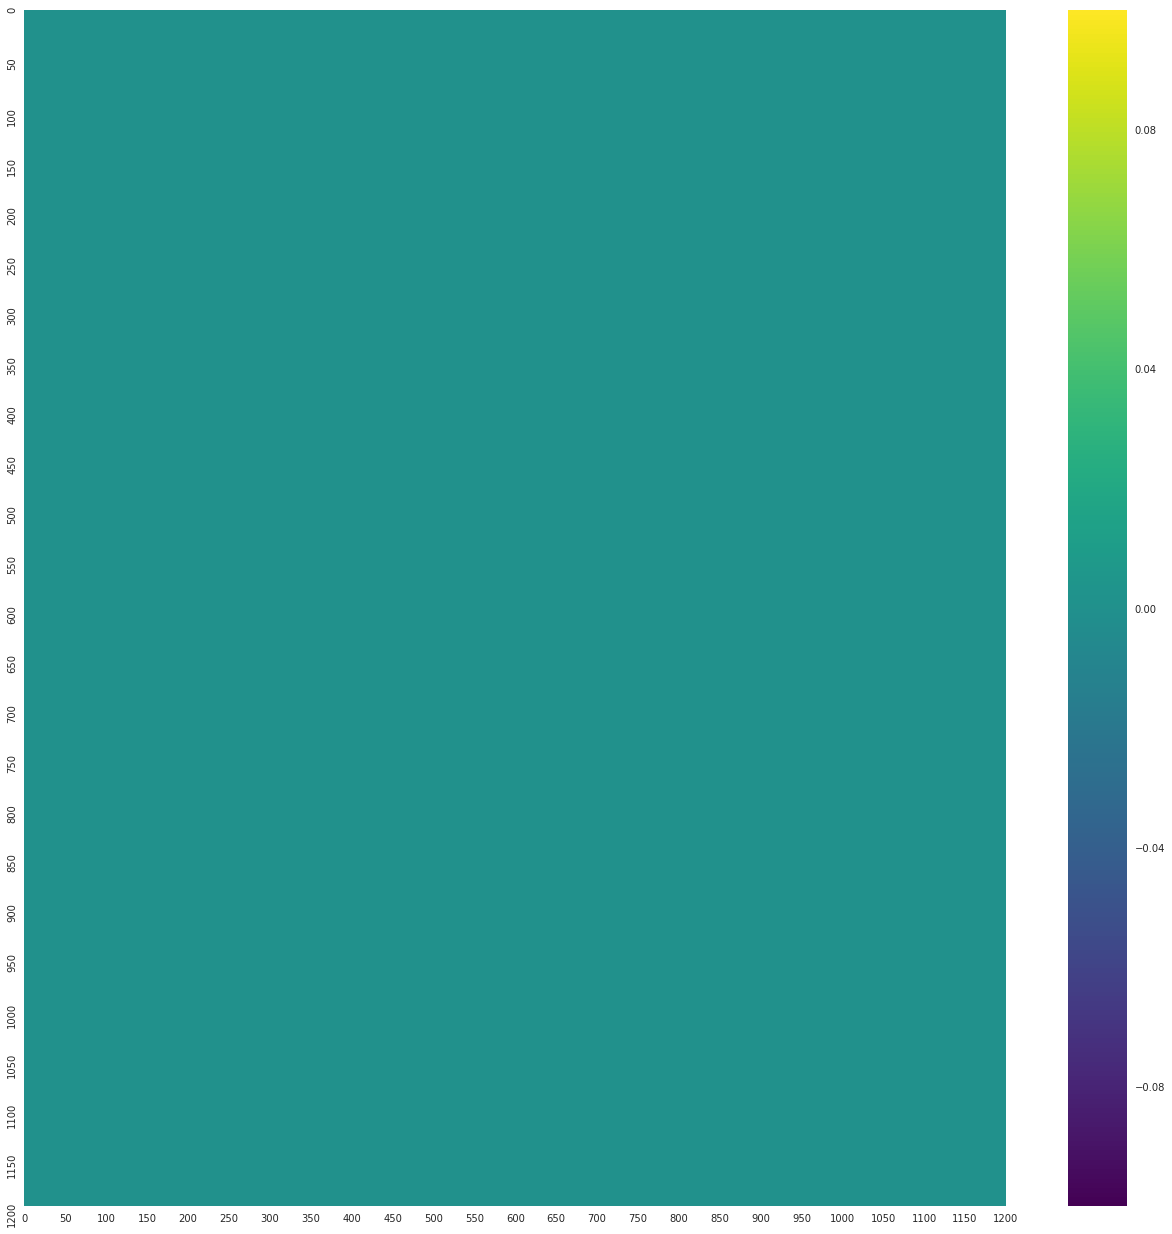

In [59]:
plt.figure(figsize = (22,22))
sns.heatmap(a_intensity,cmap = 'viridis', xticklabels = 50, yticklabels = 50)


[[   0    1    2 ... 1198 1199 1200]
 [   0    1    2 ... 1198 1199 1200]
 [   0    1    2 ... 1198 1199 1200]
 ...
 [   0    1    2 ... 1198 1199 1200]
 [   0    1    2 ... 1198 1199 1200]
 [   0    1    2 ... 1198 1199 1200]]


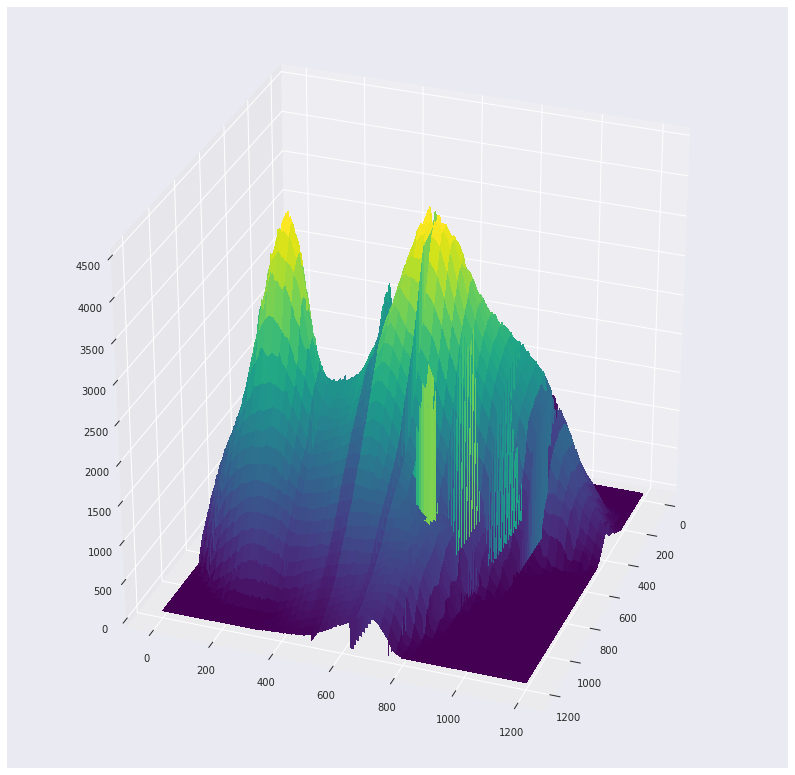

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
X = np.arange(0, 1201, 1)
Y = np.arange(0, 1201, 1)
X, Y = np.meshgrid(X,Y)
print(X)
Z = a_w

for i in range(1201):
    for j in range(1201):
        if Z[i,j] < 0:
            Z[i] = 0 
fig = plt.figure(figsize = (14,14))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=False)
ax.set_zlim(0, 4500)
ax.view_init(30, 20)
